In [1]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 26.8 MB/s 


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Dense, Concatenate
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle5 as pickle
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

# mmfc 불러오기

In [3]:
with open("/content/drive/MyDrive/multi/second_project/data/mfcc_data/mfcc_1565_final.pickle", "rb") as f:
    data = pickle.load(f)
length=[]
for i in range(len(data)):
    length.append(data[i].shape[1])
    
min_len=min(length)

result=[]
for i in range(len(data)):
    result.append(data[i][:,:min_len])
    
result_data=np.array(result)
result_data.shape

(2304, 30, 901)

## covid19 여부 불러오기



In [4]:
y = pd.read_csv("/content/drive/MyDrive/multi/second_project/data/mfcc_data/Y_data_1516.csv").iloc[:,0]


## feature 불러오기

In [5]:
features = pd.read_csv("/content/drive/MyDrive/multi/second_project/data/train_df_최종본_15세이상_65세미만.csv")
features = features.iloc[:,[4,5,6,8,7]]
feature_lst = []
for i in features.index:
    for _ in range(4):
        feature_lst.append(features.iloc[i,:].values)
features = pd.DataFrame(feature_lst)
features.shape

(2304, 5)

In [6]:
features.head(3)

,0,1,2,3,4
0,1,1,0,1,0
1,1,1,0,1,0
2,1,1,0,1,0


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    result_data, features, stratify = features, test_size = 0.2
)

In [8]:
features = Y_train.iloc[:,:-1].values
y_data = Y_train.iloc[:,-1].values

In [9]:
# 각 입력에 대한 형태를 명시
img_input = Input(shape = (30,901,1), name = "X_train")
form_input = Input(shape = (4,), name = "features")

In [10]:
# 이미지 입력
x_1 = Conv2D(32, (3,3), activation = "relu")(img_input)
x_1 = Conv2D(32, (3,3), activation = "relu")(x_1)
x_1 = MaxPooling2D(strides = 2)(x_1)
x_1 = GlobalAveragePooling2D()(x_1)

# 피쳐 입력
x_2 = Dense(128, input_dim = 4 ,activation  = "relu")(form_input)
x_2 = Dense(32, activation = "relu")(form_input)

In [11]:
# 출력을 만들기 위해 모든 입력을 하나의 텐서로 합침
x = Concatenate()([x_1, x_2])

In [12]:
rate_pred = Dense(1, name = "covid", activation = "sigmoid")(x)

In [13]:
model = Model(inputs = [img_input, form_input],
              outputs = [rate_pred])

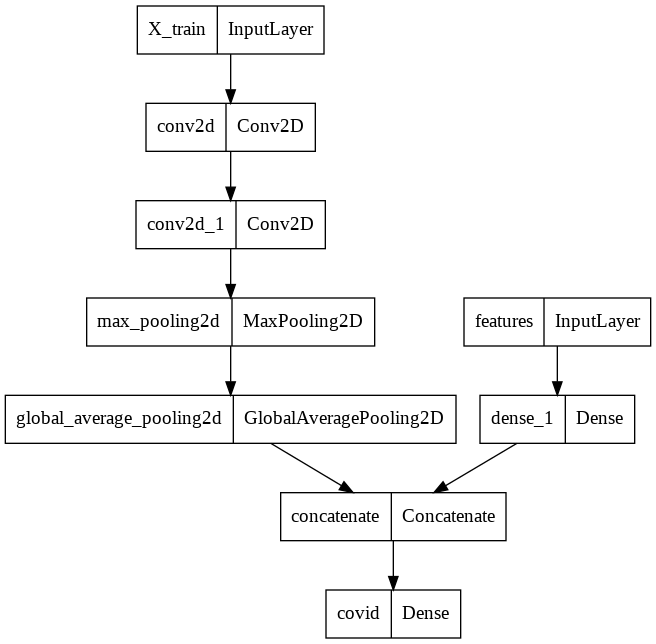

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_train (InputLayer)           [(None, 30, 901, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 28, 899, 32)  320         ['X_train[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 897, 32)  9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 448, 32)  0           ['conv2d_1[0][0]']           

In [16]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy", metrics = ["accuracy"])

In [17]:
hist = model.fit([X_train, features] , y_data,
                 epochs = 20, batch_size = 100,
                 validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 20s 227ms/step - loss: 0.8041 - accuracy: 0.4790 - val_loss: 0.7301 - val_accuracy: 0.5041
Epoch 2/20
15/15 [==============================] - 2s 122ms/step - loss: 0.7053 - accuracy: 0.4919 - val_loss: 0.6851 - val_accuracy: 0.5556
Epoch 3/20
15/15 [==============================] - 2s 105ms/step - loss: 0.6816 - accuracy: 0.5400 - val_loss: 0.6628 - val_accuracy: 0.6992
Epoch 4/20
15/15 [==============================] - 2s 103ms/step - loss: 0.6513 - accuracy: 0.7049 - val_loss: 0.6471 - val_accuracy: 0.6233
Epoch 5/20
15/15 [==============================] - 2s 103ms/step - loss: 0.6326 - accuracy: 0.6431 - val_loss: 0.6202 - val_accuracy: 0.8157
Epoch 6/20
15/15 [==============================] - 2s 104ms/step - loss: 0.6066 - accuracy: 0.7571 - val_loss: 0.5965 - val_accuracy: 0.7886
Epoch 7/20
15/15 [==============================] - 2s 104ms/step - loss: 0.5875 - accuracy: 0.7415 - val_loss: 0.5787 - val_accuracy: 0.8482
Epoch